In [2]:
 from IPython.display import Latex
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install seaborn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

0.25


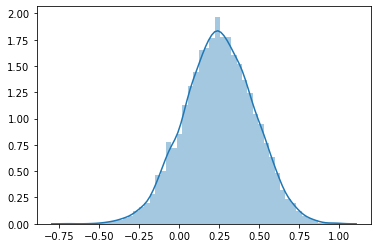

In [4]:
n_samples = 10**4

heads = 1
tails = 3
n = heads + tails

# frequentist approach
p = heads / (heads + tails)
print(p)
std_error = np.power(p*(1-p)/n, 0.5)
samples = scipy.stats.norm.rvs(p, std_error, size=n_samples)
sns.distplot(samples)

Bayesian approach

$x \sim Bernoulli(p)$

$p \sim Beta(a_{prior} + heads, b_{prior} + tails)$

In [5]:
a_prior = b_prior = 1
p = (a_prior + heads) / (a_prior + heads + b_prior + tails)
print(np.mean(samples))

0.24801272635242258


0.33718578053895754


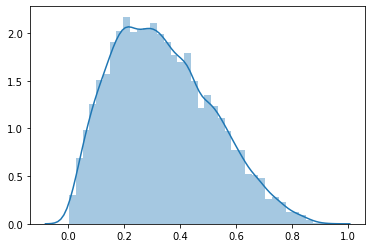

In [6]:
n_samples = 10**4
samples = scipy.stats.beta.rvs(a_prior + heads, b_prior + tails, size=n_samples)
sns.distplot(samples)
print(np.mean(samples))

0.24901031440942006


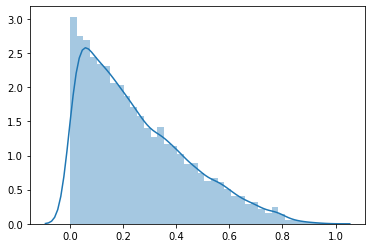

In [7]:
n_samples = 10**4
samples = scipy.stats.beta.rvs(heads, tails, size=n_samples)
sns.distplot(samples)
print(np.mean(samples))

Bayesian, frequentist equivalent approach

$x \sim Bernoulli(p)$

$p \sim Uniform(0,1)$

0.333333338888889
0.25
0.25
0.25
0.25


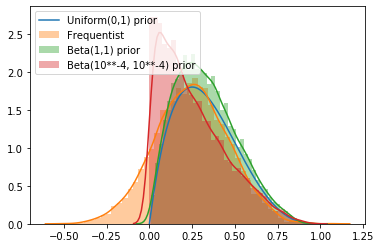

In [23]:
# Bayesian with Uniform(0,1) prior, illustrate using grid estimation
def likelihood_p_given_data(p):
    return scipy.stats.bernoulli.pmf(1, p)**heads * scipy.stats.bernoulli.pmf(0, p)**tails

likelihood_p_given_data = np.vectorize(likelihood_p_given_data)

steps = 10**4
grid_step_size = 1/steps
p_grid = np.array([0] + [grid_step_size * i for i in range(steps)])
prior_densities = scipy.stats.uniform.pdf(p_grid, 0, 1)
p_posterior =  likelihood_p_given_data(p_grid) * prior_densities
## some weird normalisation purely for plot purposes
p_posterior = p_posterior/max(p_posterior)*1.8
plt.plot(p_grid, p_posterior, label='Uniform(0,1) prior')
print(np.average(p_grid, weights=p_posterior))  ## note: not equivalent
print(p_grid[np.argmax(p_posterior)])

# frequentist approach
p = heads / (heads + tails)
print(p)
std_error = np.power(p*(1-p)/n, 0.5)
samples = scipy.stats.norm.rvs(p, std_error, size=n_samples)
normal_likelihoods = scipy.stats.norm.pdf(p_grid, p, std_error)
sns.distplot(samples, label='Frequentist')

# Bayesian with Beta(1,1) prior
a_prior = b_prior = 1
sns.distplot(scipy.stats.beta.rvs(a_prior + heads, b_prior + tails, size=n_samples), label='Beta(1,1) prior')
beta_likelihoods = scipy.stats.beta.pdf(p_grid, a_prior + heads, b_prior + tails)
print(p_grid[np.argmax(beta_likelihoods)])
plt.legend(loc="upper left")

# Bayesian with Beta(10**-4, 10**-4) prior
a_prior = b_prior = 10**-4
sns.distplot(scipy.stats.beta.rvs(a_prior + heads, b_prior + tails, size=n_samples), label='Beta(10**-4, 10**-4) prior')
beta0_likelihoods = scipy.stats.beta.pdf(p_grid, a_prior + heads, b_prior + tails)
print(p_grid[np.argmax(beta_likelihoods)])
plt.legend(loc="upper left")

In [28]:
def kl_divergence(p, q):
    return np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))

# def kl_divergence(p, q):
#     return np.sum(np.where(p != 0, p * np.log(p / q), 0))

print(kl_divergence(normal_likelihoods/sum(normal_likelihoods), beta_likelihoods/sum(beta_likelihoods)))
print(kl_divergence(normal_likelihoods/sum(normal_likelihoods), beta0_likelihoods/sum(beta0_likelihoods)))

print(kl_divergence(beta_likelihoods/sum(beta_likelihoods), normal_likelihoods/sum(normal_likelihoods)))
print(kl_divergence(beta0_likelihoods/sum(beta0_likelihoods), normal_likelihoods/sum(normal_likelihoods)))

0.04775177269325965
0.0784740467307185
0.031247872276049707
0.08806891106503764


/home/rubenmak/PycharmProjects/bernoulli_freq_vs_bayesian/venv/bernoulli_freq_vs_bayesian/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/rubenmak/PycharmProjects/bernoulli_freq_vs_bayesian/venv/bernoulli_freq_vs_bayesian/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/rubenmak/PycharmProjects/bernoulli_freq_vs_bayesian/venv/bernoulli_freq_vs_bayesian/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
